In [133]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency

# Loading data
df = pd.read_csv('updated_passengers.csv')
df.head(5) 

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,booking_destination,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,origin,destination,country_route,day_number
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,New Zealand,China,0,0,0,7.21,1,AKL,HGH,New Zealand to China,2
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,India,1,0,0,5.52,0,AKL,DEL,New Zealand to India,6
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,India,0,0,0,5.52,0,AKL,DEL,New Zealand to India,6
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,New Zealand,India,1,1,0,5.52,0,AKL,DEL,New Zealand to India,3
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,India,0,0,1,5.52,0,AKL,DEL,New Zealand to India,6


In [90]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,day_number
count,49280.000000,49280.000000,49280.000000,49280.000000,49280.000000,49280.000000,49280.000000,49280.000000,49280.000000,49280.000000
mean,1.590239,84.726623,23.055073,9.070617,0.668263,0.295657,0.426664,7.279958,0.150000,3.813535
std,1.016561,90.411115,33.832448,5.413168,0.470842,0.456342,0.494598,1.496381,0.357075,1.991925
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000,1.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000,2.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000,4.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000,5.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000,7.000000


# Maps

/var/folders/c6/j_vv349941d370ftdw7xkzkw0000gn/T/ipykernel_65632/2008510760.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


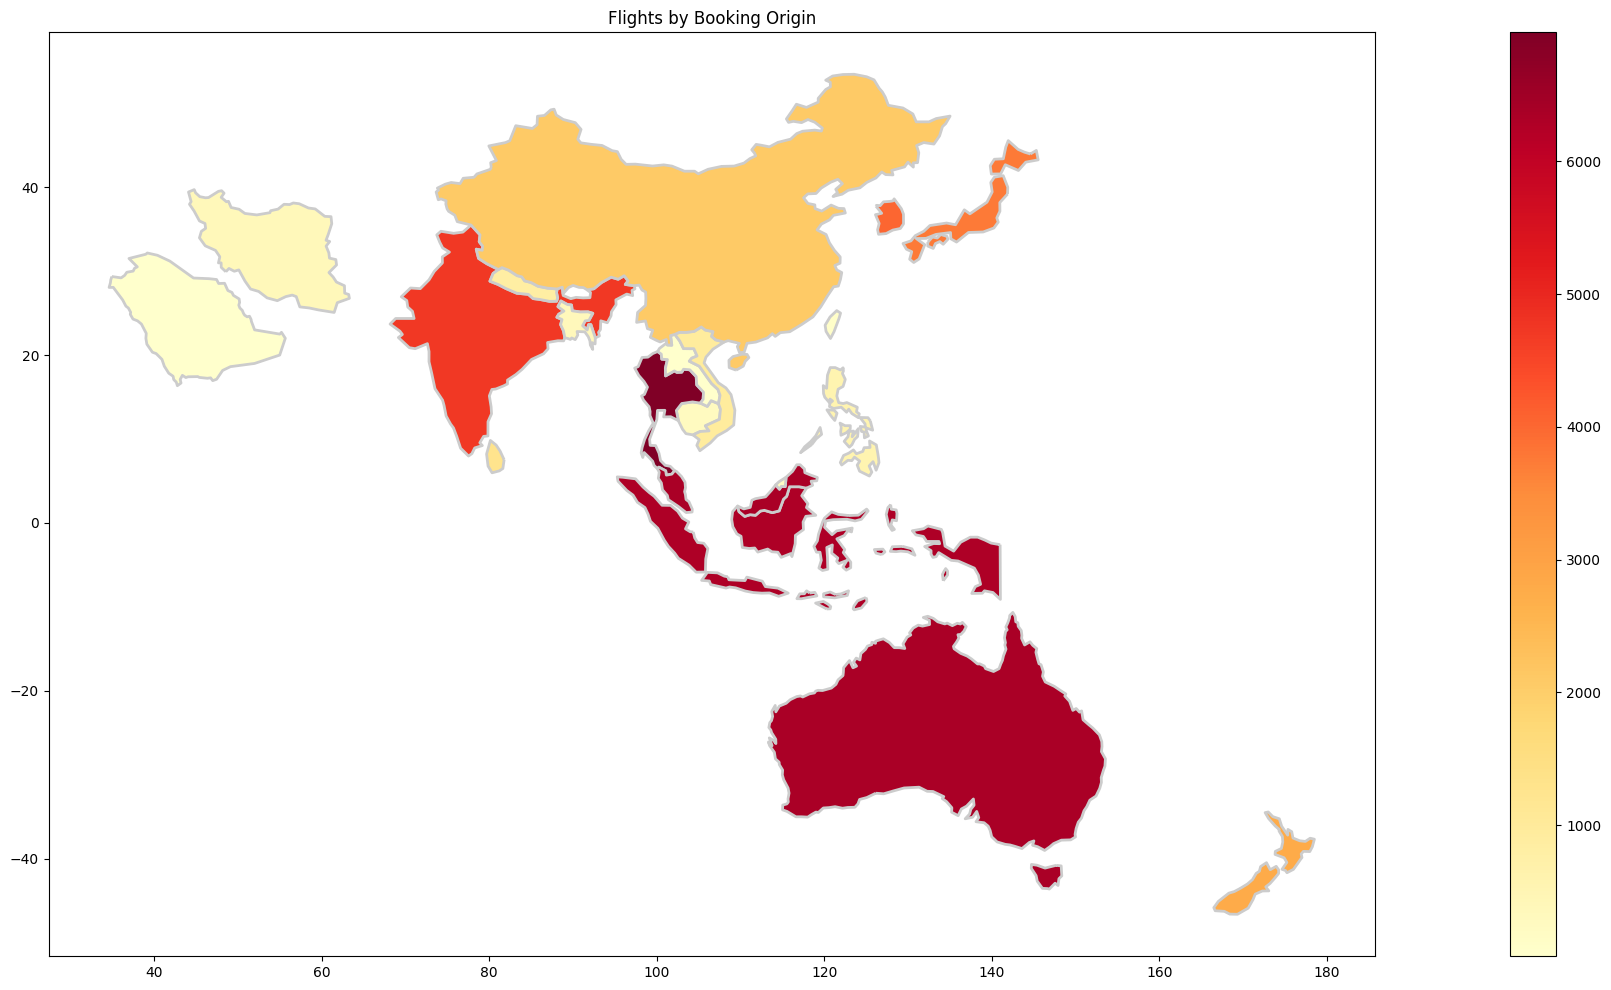

In [91]:
import geopandas as gpd
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

value_counts = df['booking_origin'].value_counts()

world = world.merge(value_counts, left_on='name', right_index=True)

fig, ax = plt.subplots(figsize=(35, 12))
world.plot(column='booking_origin', cmap='YlOrRd', linewidth=2, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Flights by Booking Origin')

plt.show()

/var/folders/c6/j_vv349941d370ftdw7xkzkw0000gn/T/ipykernel_65632/3880249623.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


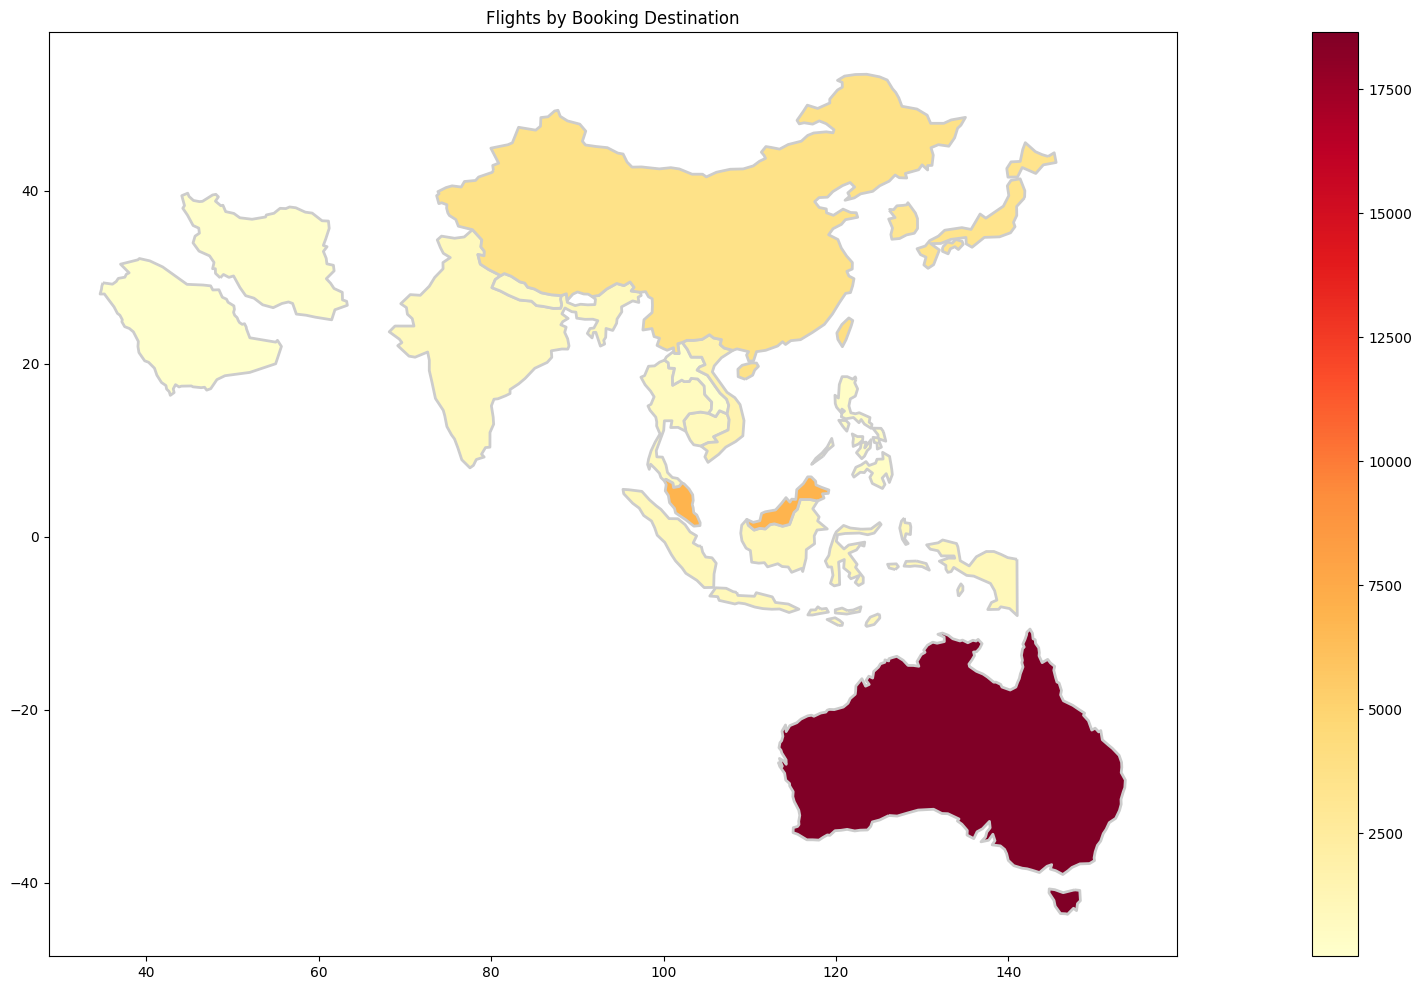

In [92]:
import geopandas as gpd
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

value_counts = df['booking_destination'].value_counts()

world = world.merge(value_counts, left_on='name', right_index=True)

fig, ax = plt.subplots(figsize=(35, 12))
world.plot(column='booking_destination', cmap='YlOrRd', linewidth=2, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Flights by Booking Destination')

plt.show()

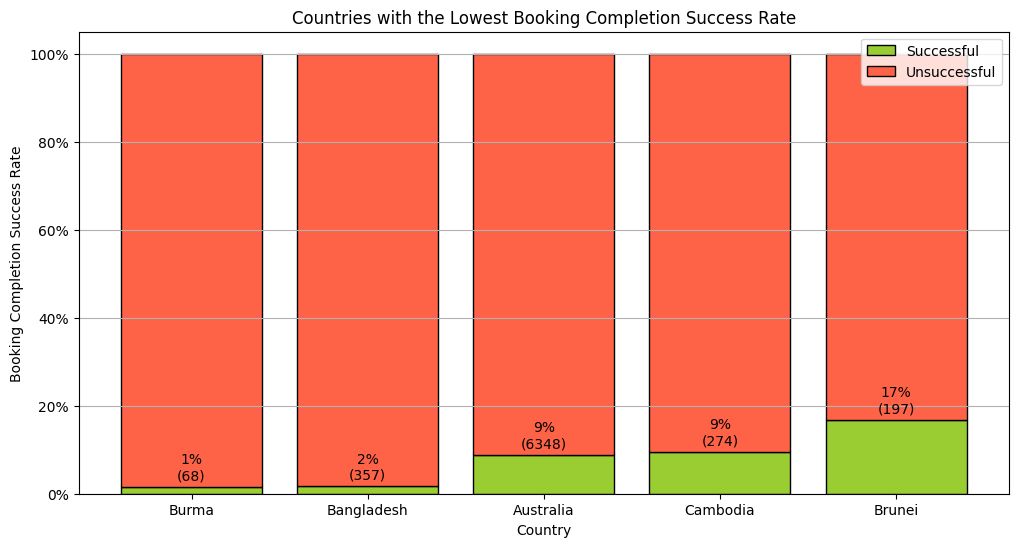

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


# Group by 'booking_origin' and calculate the booking completion success rate and count of bookings for each country
booking_data = df.groupby('booking_origin')['booking_complete'].agg(['mean', 'count']).head(5)

# Sort by completion rate in ascending order to get the lowest success rates first
booking_data = booking_data.sort_values(by='mean')

# Create the stacked bar chart
plt.figure(figsize=(12, 6))  # Optional: Set the figure size

# Plot the lowest completion rates in one color
bars_lowest = plt.bar(booking_data.index, booking_data['mean'], color='yellowgreen', edgecolor='black', label='Successful')

# Calculate the highest success rates by subtracting the lowest from 1
booking_data['highest'] = 1 - booking_data['mean']

# Plot the highest completion rates in a different color
bars_highest = plt.bar(booking_data.index, booking_data['highest'], color='tomato', edgecolor='black', bottom=booking_data['mean'], label='Unsuccessful')

# Customize the plot (optional)
plt.xlabel('Country')
plt.ylabel('Booking Completion Success Rate')
plt.title('Countries with the Lowest Booking Completion Success Rate')
plt.legend()  # Show the legend
plt.grid(axis='y')

# Show percentages on the y-axis instead of decimals
def percentage_formatter(x, pos):
    return '{:.0%}'.format(x)

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(percentage_formatter))

# Annotate each bar with percentage values and count of bookings
for bar, count in zip(bars_lowest + bars_highest, booking_data['count']):
    height = bar.get_height()
    plt.annotate(f'{height:.0%}\n({count})', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords="offset points", ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

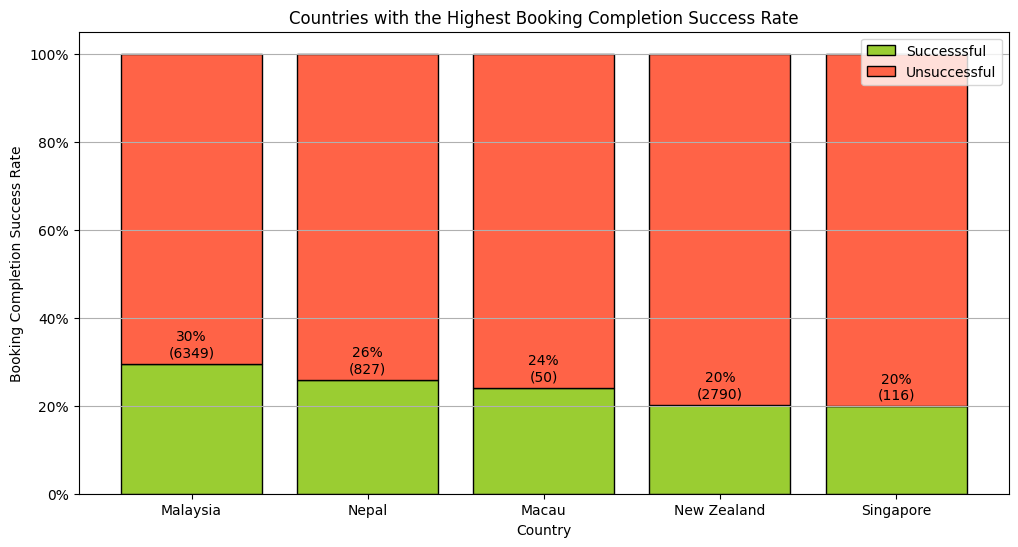

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


# Group by 'booking_origin' and calculate the booking completion success rate and count of bookings for each country
booking_data = df.groupby('booking_origin')['booking_complete'].agg(['mean', 'count'])

# Sort by completion rate in descending order to get the highest success rates first
booking_data = booking_data.sort_values(by='mean', ascending=False).head(5)

# Create the stacked bar chart
plt.figure(figsize=(12, 6))  # Optional: Set the figure size

# Plot the highest completion rates in one color
bars_highest = plt.bar(booking_data.index, booking_data['mean'], color='yellowgreen', edgecolor='black', label='Successsful')

# Calculate the lowest success rates by subtracting the highest from 1
booking_data['lowest'] = 1 - booking_data['mean']

# Plot the lowest completion rates in a different color
bars_lowest = plt.bar(booking_data.index, booking_data['lowest'], color='tomato', edgecolor='black', bottom=booking_data['mean'], label='Unsuccessful')

# Customize the plot (optional)
plt.xlabel('Country')
plt.ylabel('Booking Completion Success Rate')
plt.title('Countries with the Highest Booking Completion Success Rate')
plt.legend()  # Show the legend
plt.grid(axis='y')

# Show percentages on the y-axis instead of decimals
def percentage_formatter(x, pos):
    return '{:.0%}'.format(x)

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(percentage_formatter))

# Annotate each bar with percentage values and count of bookings
for bar, count in zip(bars_highest + bars_lowest, booking_data['count']):
    height = bar.get_height()
    plt.annotate(f'{height:.0%}\n({count})', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords="offset points", ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

# Optional Filter by Country

In [95]:
# Input a country to filter charts by booking origin
country_filter = ''

# Booking Origin

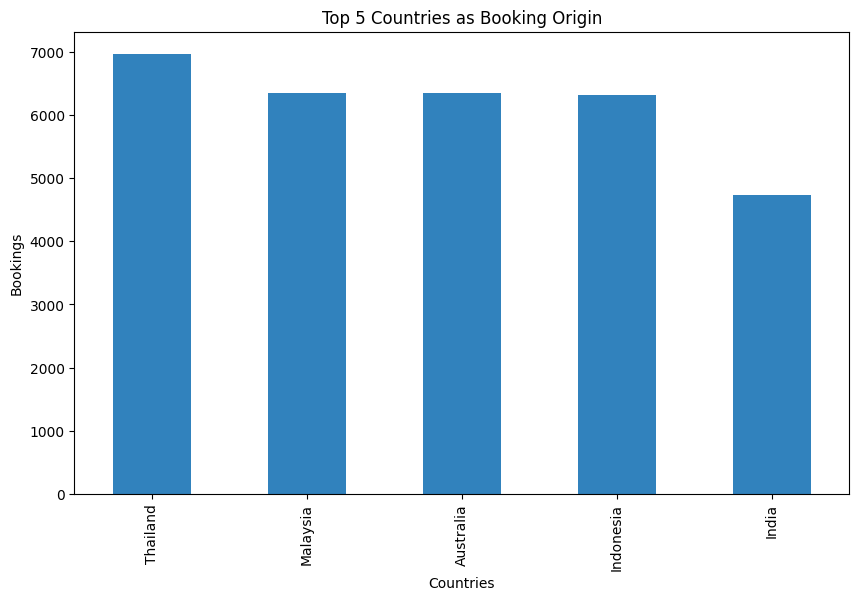

In [96]:
def plot_top_countries_by_booking_origin(df, topx, booking_destination=None):
    if booking_destination:
        value_counts = df[df['booking_destination'] == booking_destination]['booking_origin'].value_counts().head(topx)
        title = f'Top {topx} Countries from Booking Origin to {booking_destination}'
    else:
        value_counts = df['booking_origin'].value_counts().head(topx)
        title = f'Top {topx} Countries as Booking Origin'

    fig, ax = plt.subplots(figsize=(10, 6))
    value_counts.plot.bar(colormap='tab20c', ax=ax)

    plt.xlabel('Countries')
    plt.ylabel('Bookings')
    plt.title(title)

    # Display the plot
    plt.show()

plot_top_countries_by_booking_origin(df,5,country_filter)


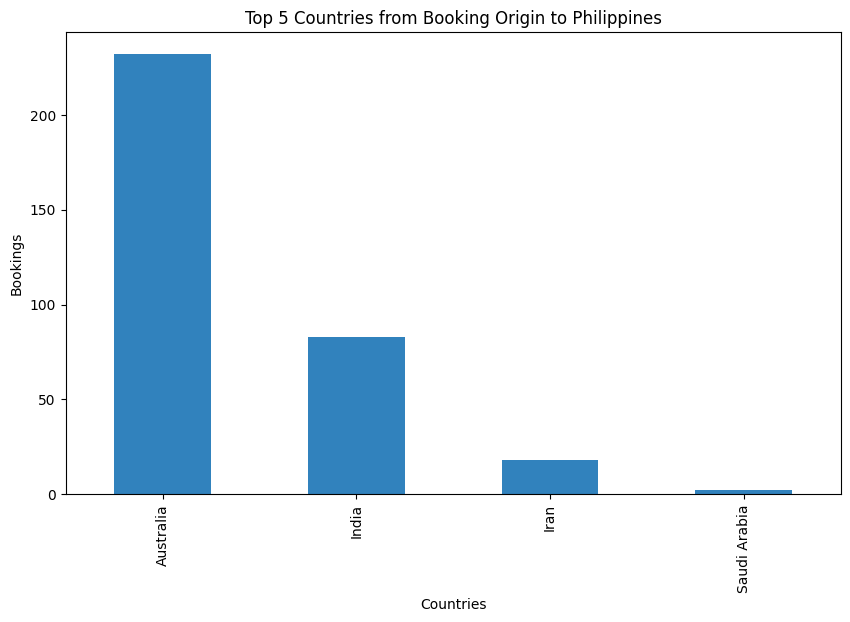

In [124]:
# example with filtered country
plot_top_countries_by_booking_origin(df,5,'Philippines')


# Booking Destination

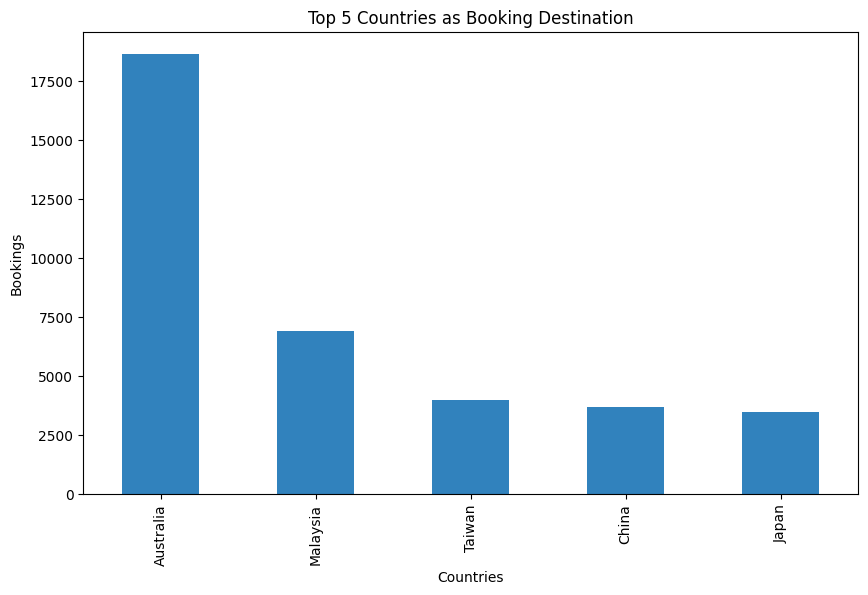

In [98]:
def plot_top_countries_by_booking_destination(df, topx, booking_origin=None):
    if booking_origin:
        value_counts = df[df['booking_origin'] == booking_origin]['booking_destination'].value_counts().head(topx)
        title = f'Top {topx} Countries from {booking_origin} to Booking Destination'
    else:
        value_counts = df['booking_destination'].value_counts().head(topx)
        title = f'Top {topx} Countries as Booking Destination'

    fig, ax = plt.subplots(figsize=(10, 6))
    value_counts.plot.bar(colormap='tab20c', ax=ax)

    plt.xlabel('Countries')
    plt.ylabel('Bookings')
    plt.title(title)

    # Display the plot
    plt.show()


plot_top_countries_by_booking_destination(df,5,country_filter)

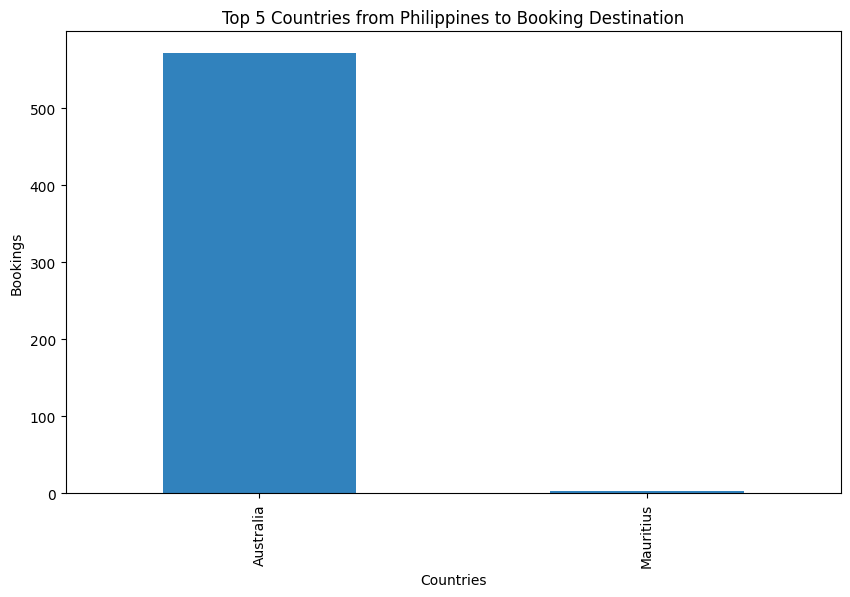

In [123]:
# example with filtered country
plot_top_countries_by_booking_destination(df,5,'Philippines')


# Routes

In [100]:
def plot_top_routes_by_country(df, topx, booking_destination=None, booking_origin=None):
    if booking_destination:
        filtered_df = df[df['booking_destination'] == booking_destination]
        title = f'Top {topx} Routes to {booking_destination}'
    elif booking_origin:
        filtered_df = df[df['booking_origin'] == booking_origin]
        title = f'Top {topx} Routes from {booking_origin}'
    else:
        filtered_df = df.copy()
        title = f'Top {topx} Routes by Country'

    value_counts = filtered_df['country_route'].value_counts().head(topx)

    fig, ax = plt.subplots(figsize=(10, 6))
    value_counts.plot.bar(colormap='tab20c', ax=ax)

    plt.xlabel('Routes')
    plt.ylabel('Bookings')
    plt.title(title)

    # Display the plot
    plt.show()

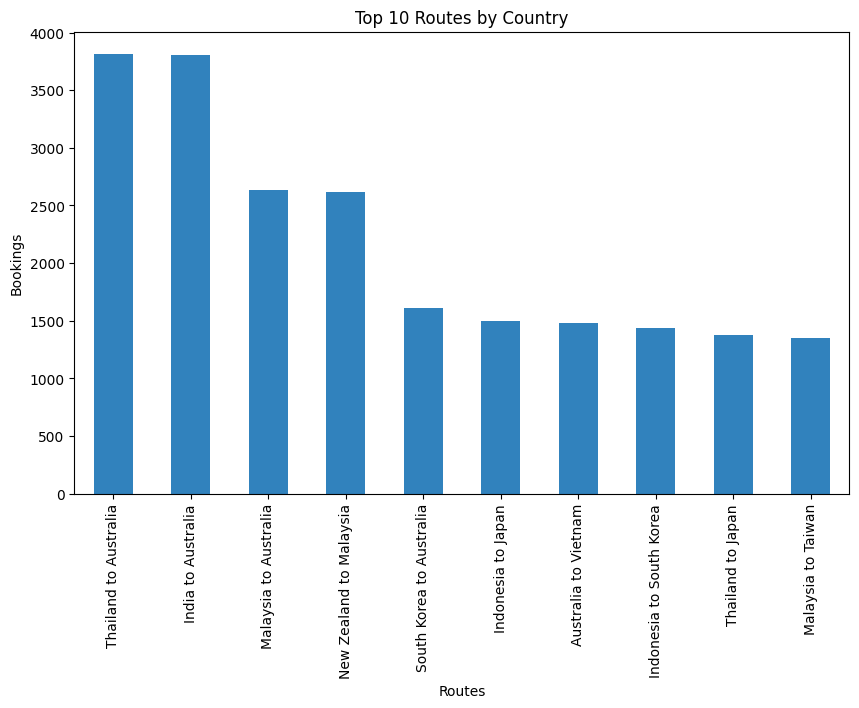

In [101]:
plot_top_routes_by_country(df,10,country_filter)

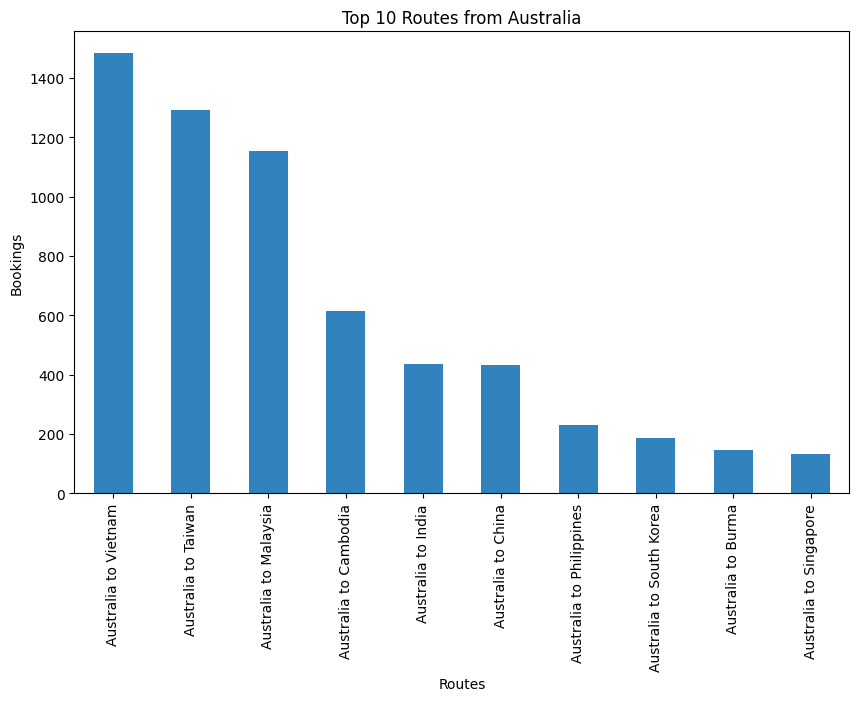

In [102]:
plot_top_routes_by_country(df,10,None,'Australia')

## Booking Completion by Route

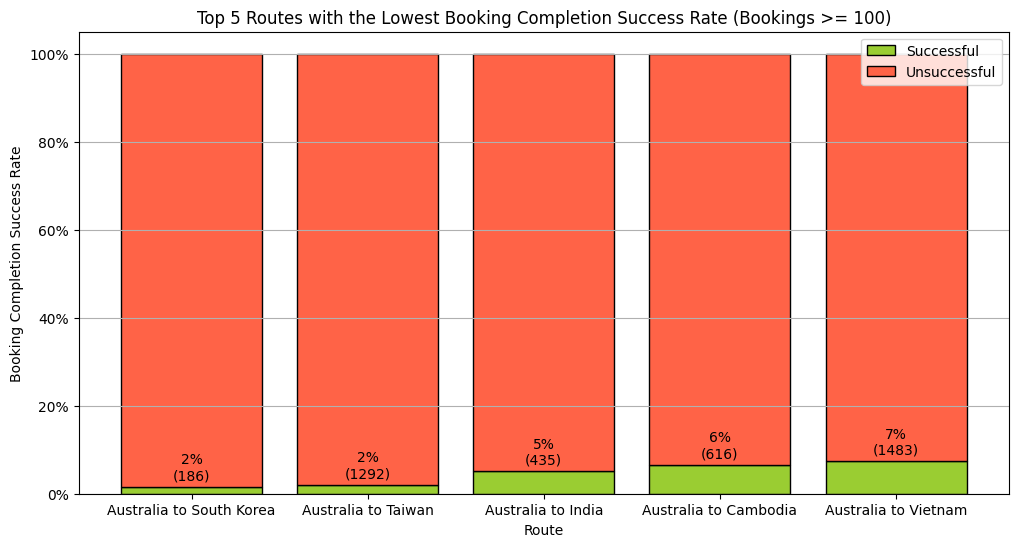

In [103]:
# sorted by booking completion rate
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def plot_booking_completion_rates_lowest(df, country_filter=False):
    # Filter the DataFrame based on the desired booking origin
    if country_filter:
        df_filtered = df.loc[df['booking_origin'] == country_filter]
    else:
        df_filtered = df

    booking_data = df_filtered.groupby('country_route')['booking_complete'].agg(['mean', 'count'])
    booking_data = booking_data[booking_data['count'] >= 100]


    booking_data = booking_data.sort_values(by='mean', ascending=True).head(5)

    booking_data['lowest'] = 1 - booking_data['mean']

    plt.figure(figsize=(12, 6)) 

    bars_highest = plt.bar(booking_data.index, booking_data['mean'], color='yellowgreen', edgecolor='black', label='Successful')

    bars_lowest = plt.bar(booking_data.index, booking_data['lowest'], color='tomato', edgecolor='black', bottom=booking_data['mean'], label='Unsuccessful')

    plt.xlabel('Route')
    plt.ylabel('Booking Completion Success Rate')
    plt.title(f'Top 5 Routes with the Lowest Booking Completion Success Rate (Bookings >= 100)')
    plt.legend() 
    plt.grid(axis='y')

    def percentage_formatter(x, pos):
        return '{:.0%}'.format(x)

    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(percentage_formatter))

    for bar, count in zip(bars_highest + bars_lowest, booking_data['count']):
        height = bar.get_height()
        plt.annotate(f'{height:.0%}\n({count})', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                     textcoords="offset points", ha='center', va='bottom', fontsize=10)

    # Show the plot
    plt.show()

plot_booking_completion_rates_lowest(df,'Australia')

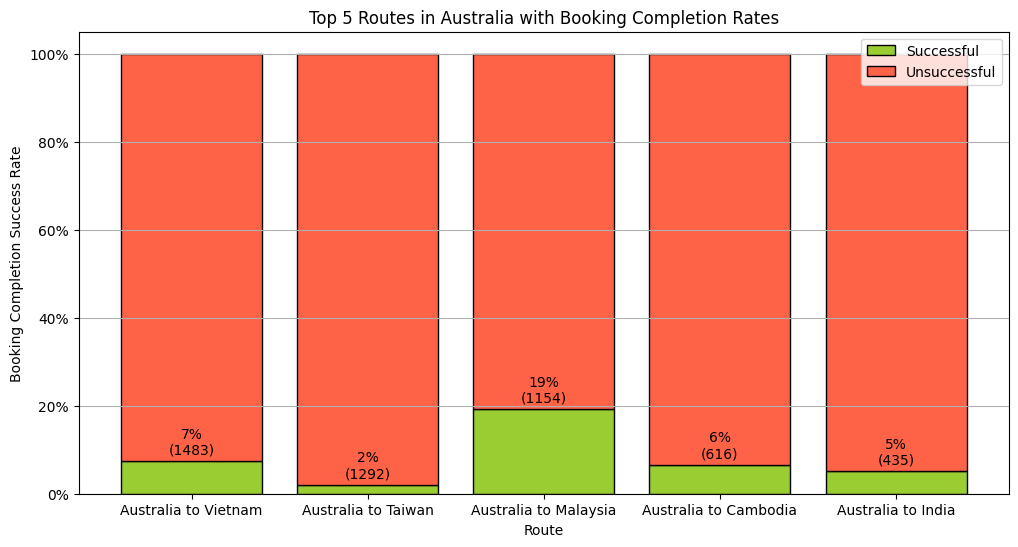

In [104]:

# sorted by booking count
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def plot_booking_count_completion_rates_lowest(df, country_filter=False):
    # Filter the DataFrame based on the desired booking origin
    if country_filter:
        df_filtered = df.loc[df['booking_origin'] == country_filter]
        title = f'Top 5 Routes in {country_filter} with Booking Completion Rates'
    else:
        df_filtered = df
        title = 'Top 5 Routes with Booking Completion Rates'

    booking_data = df_filtered.groupby('country_route')['booking_complete'].agg(['mean', 'count'])
    #booking_data = booking_data[booking_data['count'] >= 100]

    # Sort the routes by the most number of bookings (count) in descending order
    booking_data = booking_data.sort_values(by='count', ascending=False).head(5)

    booking_data['lowest'] = 1 - booking_data['mean']

    plt.figure(figsize=(12, 6)) 

    bars_highest = plt.bar(booking_data.index, booking_data['mean'], color='yellowgreen', edgecolor='black', label='Successful')

    bars_lowest = plt.bar(booking_data.index, booking_data['lowest'], color='tomato', edgecolor='black', bottom=booking_data['mean'], label='Unsuccessful')

    plt.xlabel('Route')
    plt.ylabel('Booking Completion Success Rate')
    plt.title(title)
    plt.legend() 
    plt.grid(axis='y')

    def percentage_formatter(x, pos):
        return '{:.0%}'.format(x)

    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(percentage_formatter))

    for bar, count in zip(bars_highest + bars_lowest, booking_data['count']):
        height = bar.get_height()
        plt.annotate(f'{height:.0%}\n({count})', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                     textcoords="offset points", ha='center', va='bottom', fontsize=10)

    # Show the plot
    plt.show()

plot_booking_count_completion_rates_lowest(df, 'Australia')


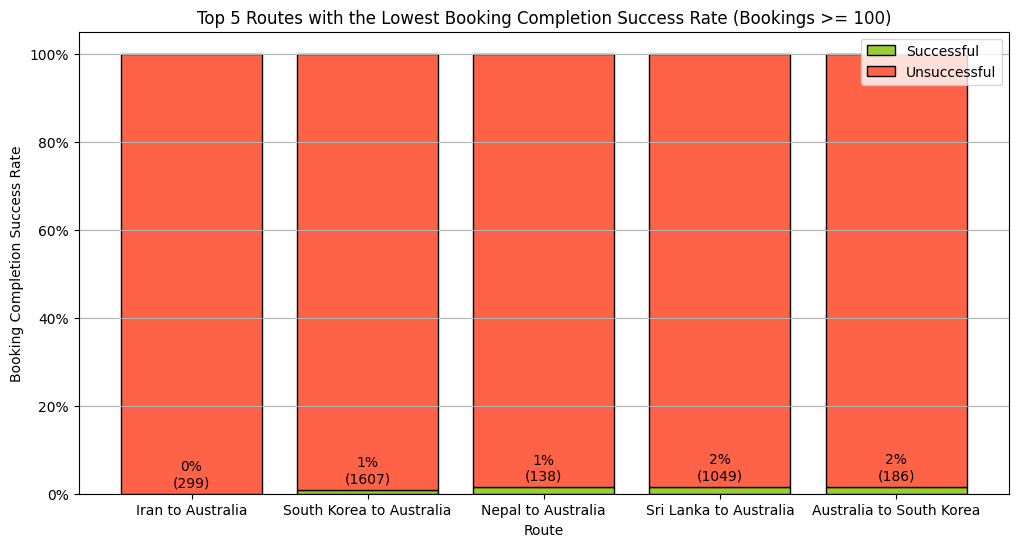

In [105]:
plot_booking_completion_rates_lowest(df)

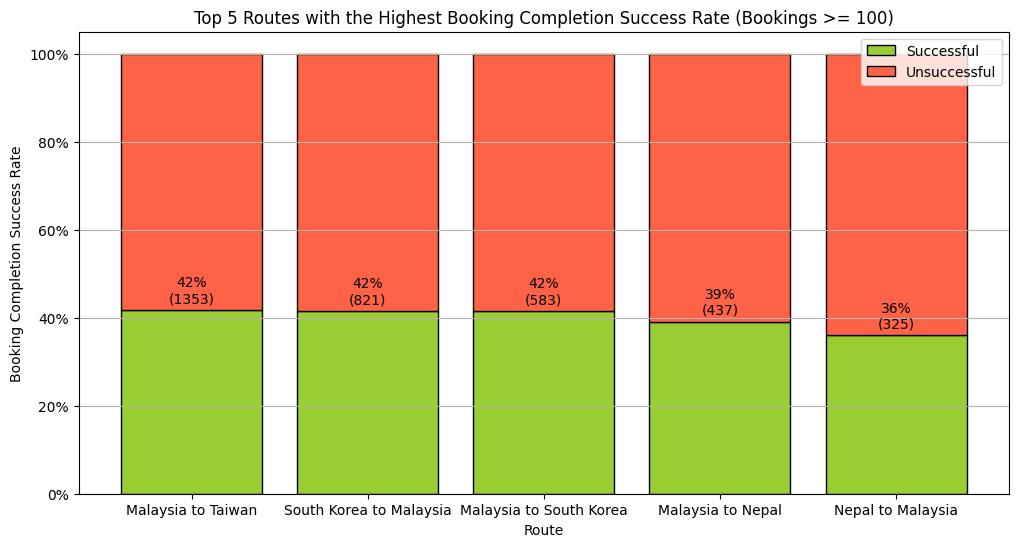

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def plot_booking_completion_rates_highest(df, country_filter=False):
    # Filter the DataFrame based on the desired booking origin
    if country_filter:
        df_filtered = df.loc[df['booking_origin'] == country_filter]
    else:
        df_filtered = df

    booking_data = df_filtered.groupby('country_route')['booking_complete'].agg(['mean', 'count'])
    booking_data = booking_data[booking_data['count'] >= 100]


    booking_data = booking_data.sort_values(by='mean', ascending=False).head(5)

    booking_data['lowest'] = 1 - booking_data['mean']

    plt.figure(figsize=(12, 6)) 

    bars_highest = plt.bar(booking_data.index, booking_data['mean'], color='yellowgreen', edgecolor='black', label='Successful')

    bars_lowest = plt.bar(booking_data.index, booking_data['lowest'], color='tomato', edgecolor='black', bottom=booking_data['mean'], label='Unsuccessful')

    plt.xlabel('Route')
    plt.ylabel('Booking Completion Success Rate')
    plt.title(f'Top 5 Routes with the Highest Booking Completion Success Rate (Bookings >= 100)')
    plt.legend() 
    plt.grid(axis='y')

    def percentage_formatter(x, pos):
        return '{:.0%}'.format(x)

    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(percentage_formatter))

    for bar, count in zip(bars_highest + bars_lowest, booking_data['count']):
        height = bar.get_height()
        plt.annotate(f'{height:.0%}\n({count})', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                     textcoords="offset points", ha='center', va='bottom', fontsize=10)

    # Show the plot
    plt.show()

plot_booking_completion_rates_highest(df)

# Trip Data

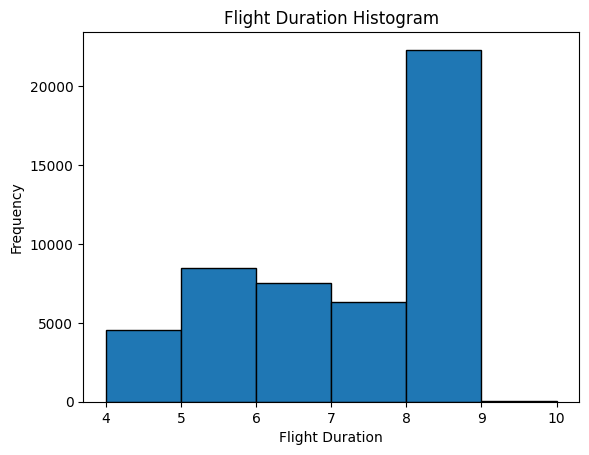

In [107]:
def plot_flight_duration_histogram(df, booking_origin=None):
    if booking_origin:
        filtered_df = df[df['booking_origin'] == booking_origin]
        title = f'Flight Duration Histogram for {booking_origin}'
    else:
        filtered_df = df.copy()
        title = 'Flight Duration Histogram'

    bin_edges = range(int(min(filtered_df['flight_duration'])), int(max(filtered_df['flight_duration']))+2)
    plt.hist(filtered_df['flight_duration'], bins=bin_edges, edgecolor='black')

    plt.xlabel('Flight Duration')
    plt.ylabel('Frequency')
    plt.title(title)

    # Display the histogram
    plt.show()

plot_flight_duration_histogram(df,country_filter)

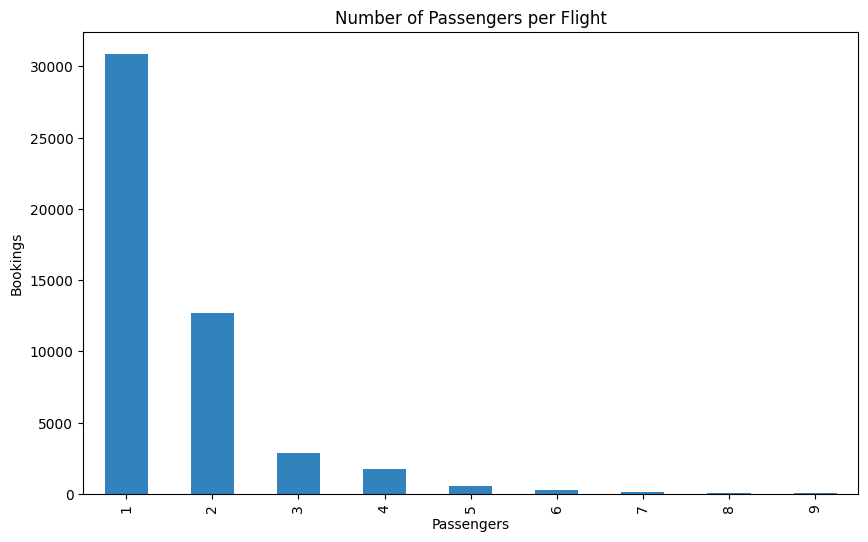

In [108]:
def plot_num_passengers (df,booking_origin=None):
    if booking_origin:
        filtered_df = df[df['booking_origin'] == booking_origin]
        title = f'Number of Passengers per Flight for {booking_origin}'
    else:
        filtered_df = df.copy()
        title = 'Number of Passengers per Flight'
    
    value_counts = filtered_df['num_passengers'].value_counts()

    fig, ax = plt.subplots(figsize=(10, 6))
    value_counts.plot.bar(colormap='tab20c', ax=ax)

    plt.xlabel('Passengers')
    plt.ylabel('Bookings')
    plt.title(title)

    # Display the plot
    plt.show()

plot_num_passengers(df)
    

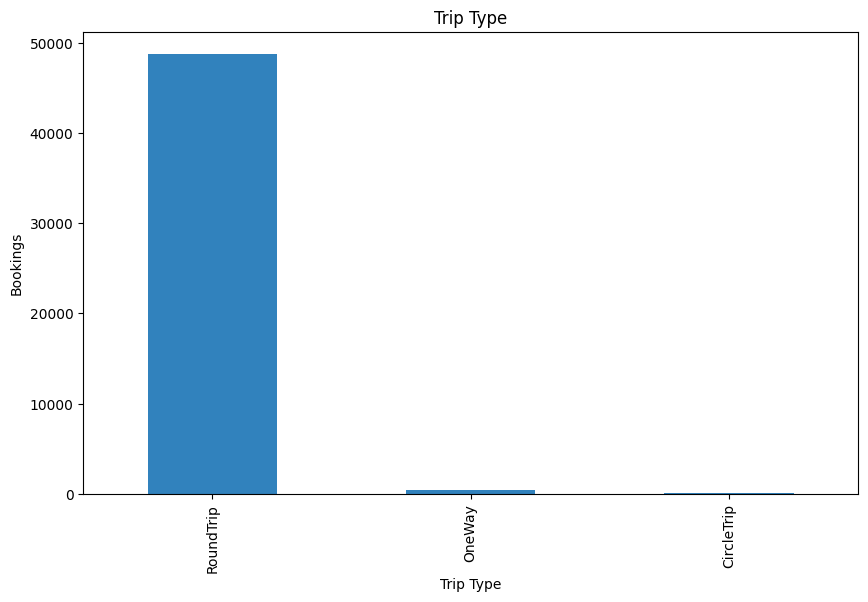

In [109]:
def plot_trip_type (df,booking_origin=None):
    if booking_origin:
        filtered_df = df[df['booking_origin'] == booking_origin]
        title = f'Trip Type for {booking_origin}'
    else:
        filtered_df = df.copy()
        title = 'Trip Type'
    
    value_counts = filtered_df['trip_type'].value_counts()

    fig, ax = plt.subplots(figsize=(10, 6))
    value_counts.plot.bar(colormap='tab20c', ax=ax)

    plt.xlabel('Trip Type')
    plt.ylabel('Bookings')
    plt.title(title)

    # Display the plot
    plt.show()

plot_trip_type(df)
    

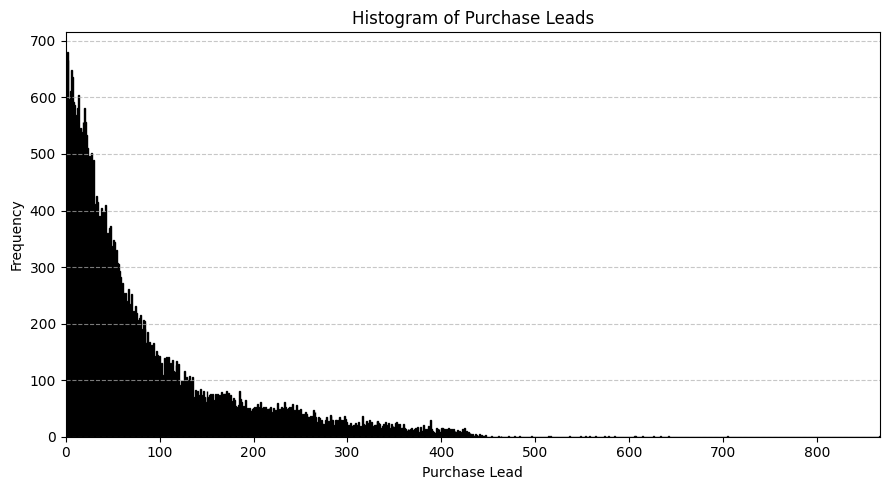

In [141]:
def plot_purchase_lead_histogram(df, booking_origin=None):
    if booking_origin:
        filtered_data = df[df['booking_origin'] == booking_origin]
        title = f'{booking_origin} | Histogram of Purchase Leads'
    else:
        filtered_data = df.copy()
        title = 'Histogram of Purchase Leads'

    purchase_lead_data = filtered_data['purchase_lead']

    num_bins = filtered_data['purchase_lead'].max()

    plt.figure(figsize=(9, 5))
    plt.hist(purchase_lead_data, bins=num_bins, color='skyblue', edgecolor='black')

    plt.xlabel('Purchase Lead')
    plt.ylabel('Frequency')
    plt.title(title)

    highest_value = filtered_data['purchase_lead'].max()
    plt.xlim(0, highest_value)

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    plt.show()

plot_purchase_lead_histogram(df, country_filter)

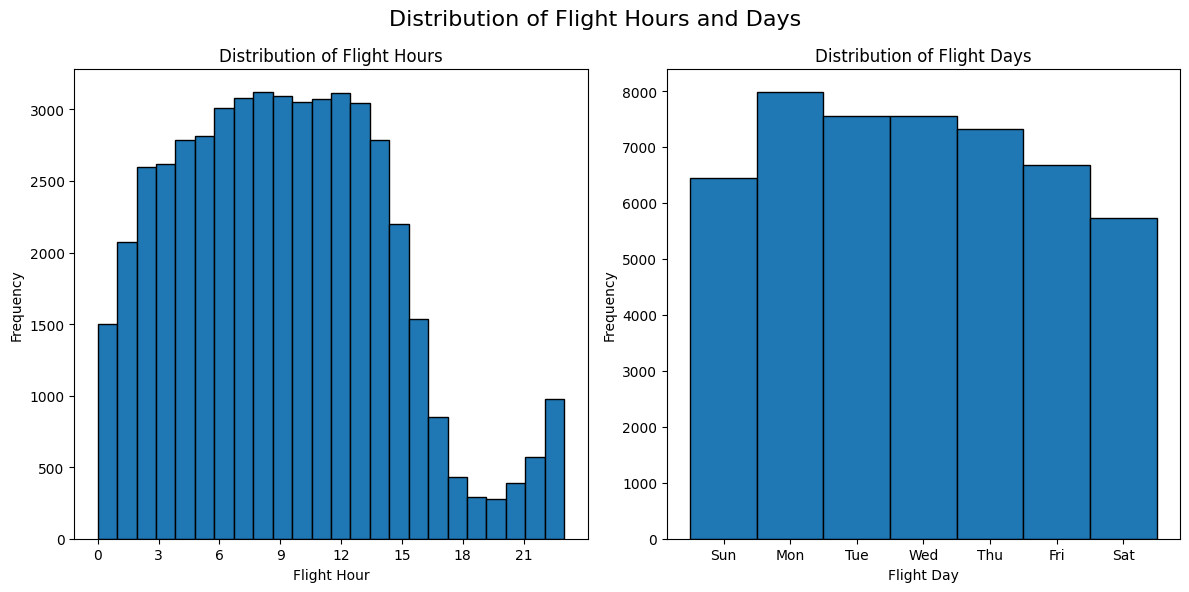

In [128]:
def plot_flight_hour_day_distribution(df, booking_origin=None):
    if booking_origin:
        filtered_data = df[df['booking_origin'] == booking_origin]
        title = f'{booking_origin} | Distribution of Flight Hours and Days'
    else:
        filtered_data = df.copy()
        title = 'Distribution of Flight Hours and Days'

    flight_hour_data = filtered_data['flight_hour']

    # Chronologically rearrange flight_day data
    days_order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
    flight_day_data = filtered_data['flight_day'].value_counts().reindex(days_order)

    plt.figure(figsize=(12, 6))

    # Histogram for flight_hour
    plt.subplot(1, 2, 1)
    plt.hist(flight_hour_data, bins=24, edgecolor='k')
    plt.xlabel('Flight Hour')
    plt.ylabel('Frequency')
    plt.title('Distribution of Flight Hours')

    # Set x-axis ticks at intervals of 3
    plt.xticks(range(0, 24, 3))

    # Histogram for flight_day
    plt.subplot(1, 2, 2)
    plt.bar(flight_day_data.index, flight_day_data.values, width=1, edgecolor='k')
    plt.xlabel('Flight Day')
    plt.ylabel('Frequency')
    plt.title('Distribution of Flight Days')

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

plot_flight_hour_day_distribution(df,country_filter)

# Booking Completion

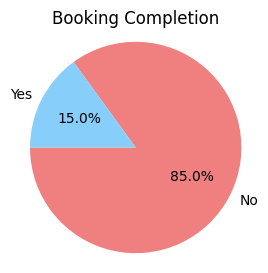

In [129]:
def plot_booking_completion_pie_chart(df, booking_origin=None):
    if booking_origin:
        filtered_data = df[df['booking_origin'] == booking_origin]
        title = f'{booking_origin} | Booking Completion'
    else:
        filtered_data = df.copy()
        title = 'Booking Completion'

    count_no = filtered_data['booking_complete'].value_counts()[0]
    count_yes = filtered_data['booking_complete'].value_counts()[1]

    # Data for the pie chart
    labels = ['No', 'Yes']
    sizes = [count_no, count_yes]
    colors = ['lightcoral', 'lightskyblue']
    explode = (0, 0) 

    # Create the pie chart
    plt.figure(figsize=(3, 3))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=180)
    plt.title(title)
    plt.axis('equal') 
    plt.show()

plot_booking_completion_pie_chart(df,country_filter)

<Figure size 800x600 with 0 Axes>

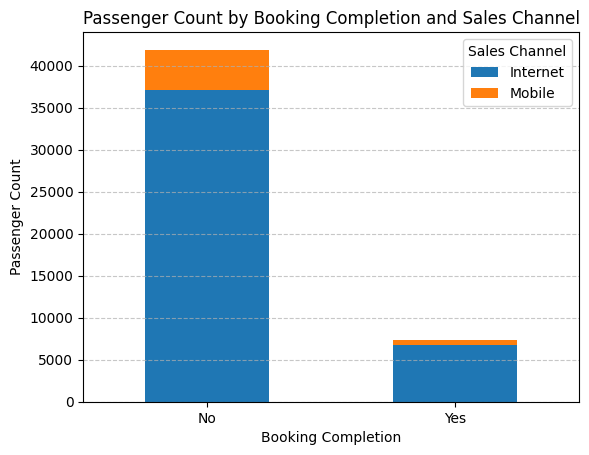

In [131]:
def plot_booking_completion_by_sales_channel(df, booking_origin=None):
    if booking_origin:
        filtered_data = df[df['booking_origin'] == booking_origin]
        title = f'{booking_origin} | Passenger Count by Booking Completion and Sales Channel'
    else:
        filtered_data = df.copy()
        title = 'Passenger Count by Booking Completion and Sales Channel'

    filtered_data["booking_completion"] = filtered_data["booking_complete"].replace({0: "No", 1: "Yes"})

    booking_counts = filtered_data.groupby(["booking_completion", "sales_channel"]).size()

    booking_counts = booking_counts.unstack(fill_value=0)

    # Bar graph
    plt.figure(figsize=(8, 6))
    booking_counts.plot(kind="bar", stacked=True)
    plt.title(title)
    plt.xlabel("Booking Completion")
    plt.ylabel("Passenger Count")
    plt.xticks(rotation=0)
    plt.legend(title="Sales Channel", loc="upper right", labels=["Internet", "Mobile"])
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.xticks(range(len(booking_counts.index)), booking_counts.index)  # Set the ticks explicitly
    plt.show()

plot_booking_completion_by_sales_channel(df,country_filter)

# Additional Services

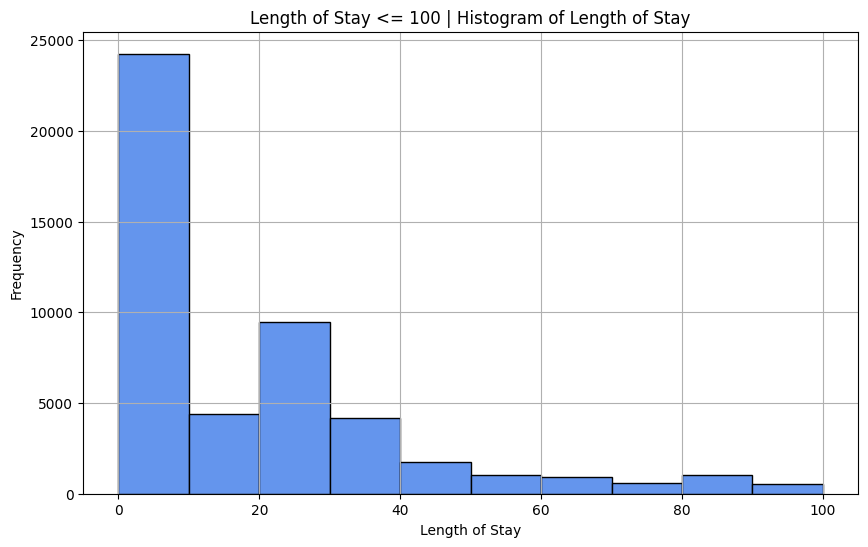

In [110]:
def plot_length_of_stay_histogram(df, max_length_of_stay=None, booking_origin=None):
    if booking_origin:
        filtered_data = df[df['booking_origin'] == booking_origin]
        title = f'{booking_origin} | '
    else:
        filtered_data = df.copy()
        title = ''

    if max_length_of_stay:
        filtered_data = filtered_data[filtered_data['length_of_stay'] <= max_length_of_stay]
        title += f'Length of Stay <= {max_length_of_stay}'
    else:
        title += 'All Lengths of Stay'

    length_of_stay_data = filtered_data['length_of_stay']

    plt.figure(figsize=(10, 6))
    plt.hist(length_of_stay_data, bins=10, color='cornflowerblue', edgecolor='black')

    # Customize the plot (optional)
    plt.xlabel('Length of Stay')
    plt.ylabel('Frequency')
    plt.title(f'{title} | Histogram of Length of Stay')
    plt.grid(True)

    # Show the plot
    plt.show()

plot_length_of_stay_histogram(df, 100,country_filter)

    

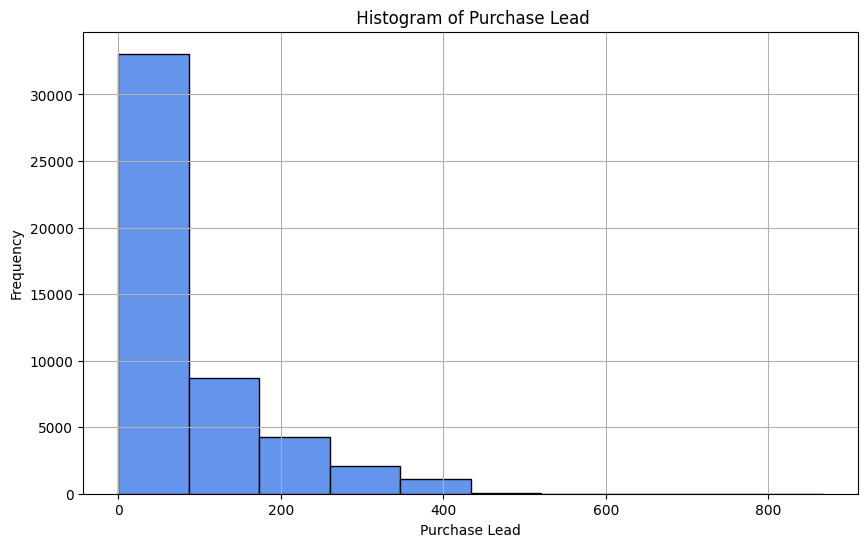

In [111]:
def plot_purchase_lead_histogram(df, booking_origin=None, max_purchase_lead=None):
    if booking_origin:
        filtered_data = df[df['booking_origin'] == booking_origin]
        title = f'{booking_origin} | '
    else:
        filtered_data = df.copy()
        title = ''

    if max_purchase_lead:
        filtered_data = filtered_data[filtered_data['purchase_lead'] <= max_purchase_lead]
        title += f'Purchase Lead <= {max_purchase_lead}'

    purchase_lead_data = filtered_data['purchase_lead']

    plt.figure(figsize=(10, 6))
    plt.hist(purchase_lead_data, bins=10, color='cornflowerblue', edgecolor='black')

    # Customize the plot (optional)
    plt.xlabel('Purchase Lead')
    plt.ylabel('Frequency')
    plt.title(f'{title} Histogram of Purchase Lead')
    plt.grid(True)

    # Show the plot
    plt.show()

plot_purchase_lead_histogram(df, country_filter)

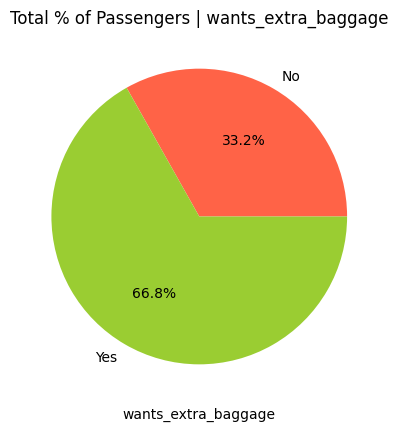

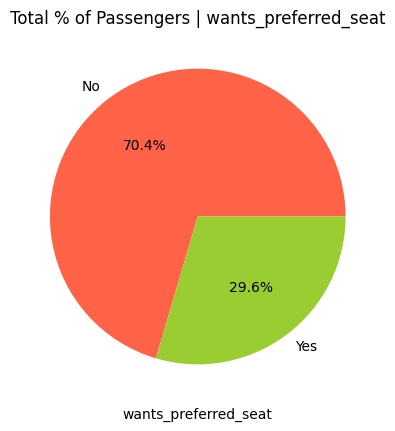

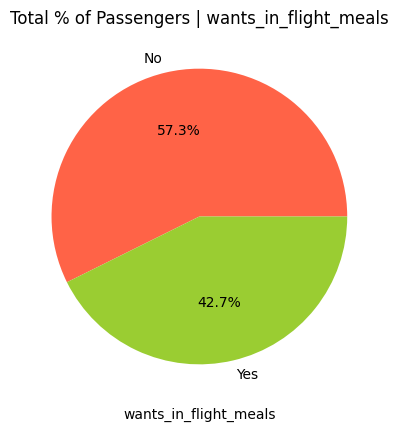

In [112]:
services = ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']

def plot_services_pie_charts(df, services, booking_origin=None):
    if booking_origin:
        filtered_df = df[df['booking_origin'] == booking_origin]
        title_prefix = f'{booking_origin} | '
    else:
        filtered_df = df.copy()
        title_prefix = ''

    for service in services:
        count = filtered_df[service].value_counts().sort_index()
        plt.pie(count, labels=["No", "Yes"], autopct='%1.1f%%', colors=["tomato", "yellowgreen"])

        plt.xlabel(service)
        plt.title(title_prefix + f"Total % of Passengers | {service}")
        plt.show()

plot_services_pie_charts(df,services,country_filter)

## Wants In Flight Meals

In [113]:
# For binary and continous variable correlation
def capitalize_variable(variable):
    return variable.replace('_', ' ').capitalize()

def plot_bi_serial_correlation(df, binary, continuous, booking_origin=None):
    if booking_origin:
        filtered_df = df[df['booking_origin'] == booking_origin]
        title = f'{booking_origin} | {capitalize_variable(binary)} vs {capitalize_variable(continuous)}'
    else:
        filtered_df = df.copy()
        title = f'{capitalize_variable(binary)} vs {capitalize_variable(continuous)}'

    # Calculate the point-biserial correlation
    correlation_coefficient, p_value = stats.pointbiserialr(filtered_df[binary], filtered_df[continuous])

    # Create a scatter plot of the data
    plt.scatter(filtered_df[binary], filtered_df[continuous])

    # Add labels and title
    plt.xlabel({capitalize_variable(binary)})
    plt.ylabel(capitalize_variable(continuous))
    plt.title(f'{title} | Point-Biserial Correlation: {correlation_coefficient:.2f} (p-value: {p_value:.2f})')

    # Display the plot
    plt.show()

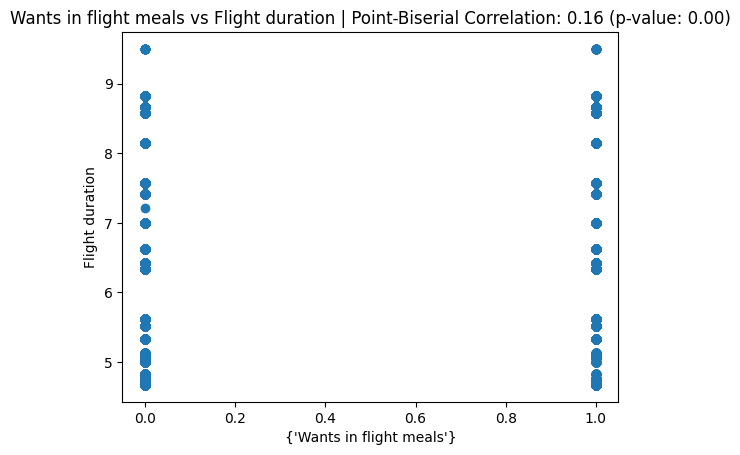

In [114]:
plot_bi_serial_correlation(df, 'wants_in_flight_meals', 'flight_duration', country_filter)

#weak correlation
#can also be explained bc the min flight length is 4 hrs, which is relatively long. it might have more correlation if we could compare to flights shorter in length (1-2 hrs)

## Extra Baggage

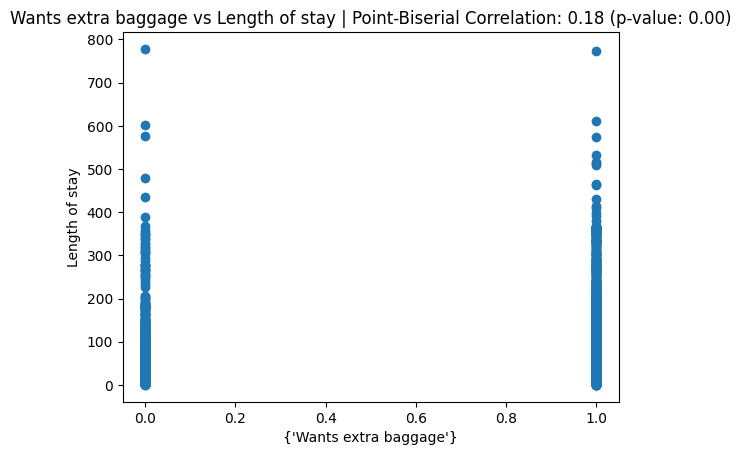

In [115]:
plot_bi_serial_correlation(df, 'wants_extra_baggage', 'length_of_stay', country_filter)

## Preferred Seat

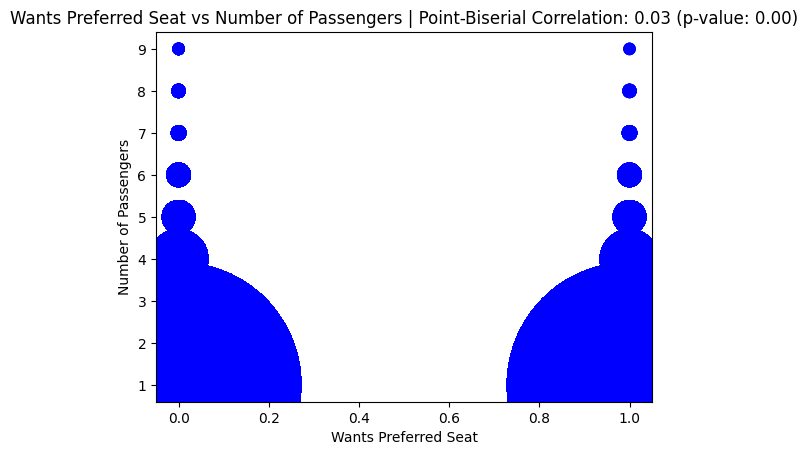

In [116]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Wants extra baggage vs length of stay (outliers removed)
a = df['wants_preferred_seat']
b = df['num_passengers']

# Calculate the point-biserial correlation
correlation_coefficient, p_value = stats.pointbiserialr(a, b)

# Calculate the concentration of points
concentration = b.value_counts()  # Assuming 'length_of_stay' is a discrete variable
max_concentration = concentration.max()
sizes = concentration[b].values  # Use concentration values as sizes

# Create a bubble plot of the filtered data
plt.scatter(a, b, s=sizes, c='blue', alpha=0.4)

# Add labels and title
plt.xlabel('Wants Preferred Seat')
plt.ylabel('Number of Passengers')
plt.title(f'Wants Preferred Seat vs Number of Passengers | Point-Biserial Correlation: {correlation_coefficient:.2f} (p-value: {p_value:.2f})')

# Display the plot
plt.show()


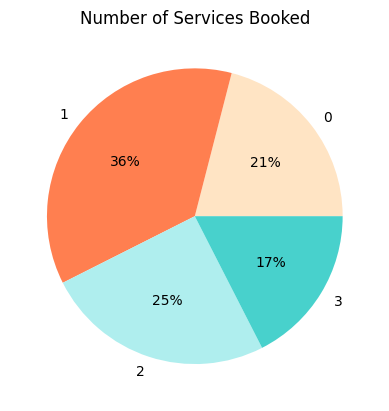

In [117]:
# By Number of Services Booked
df['total_services'] = df['wants_extra_baggage'] + df['wants_preferred_seat'] + df['wants_in_flight_meals']

def plot_number_of_services_booked(df, booking_origin=None):
    if booking_origin:
        filtered_df = df[df['booking_origin'] == booking_origin]
        title = f'{booking_origin} | Number of Services Booked'
    else:
        filtered_df = df.copy()
        title = 'Number of Services Booked'

    value_counts = filtered_df['total_services'].value_counts().reset_index()
    value_counts_sorted = value_counts.sort_values('index')

    plt.pie(value_counts_sorted['total_services'], labels=value_counts_sorted['index'], autopct='%1.0f%%', colors=['bisque', 'coral', 'paleturquoise', 'mediumturquoise'])
    plt.title(title)

    plt.show()

plot_number_of_services_booked(df)

# Passengers are more likely to purchase 2 or more services
# Recommendation: Bundle packages at a slight discount to incentivize people to book more services
# Next question: Which services?

# Correlation of Additional Services

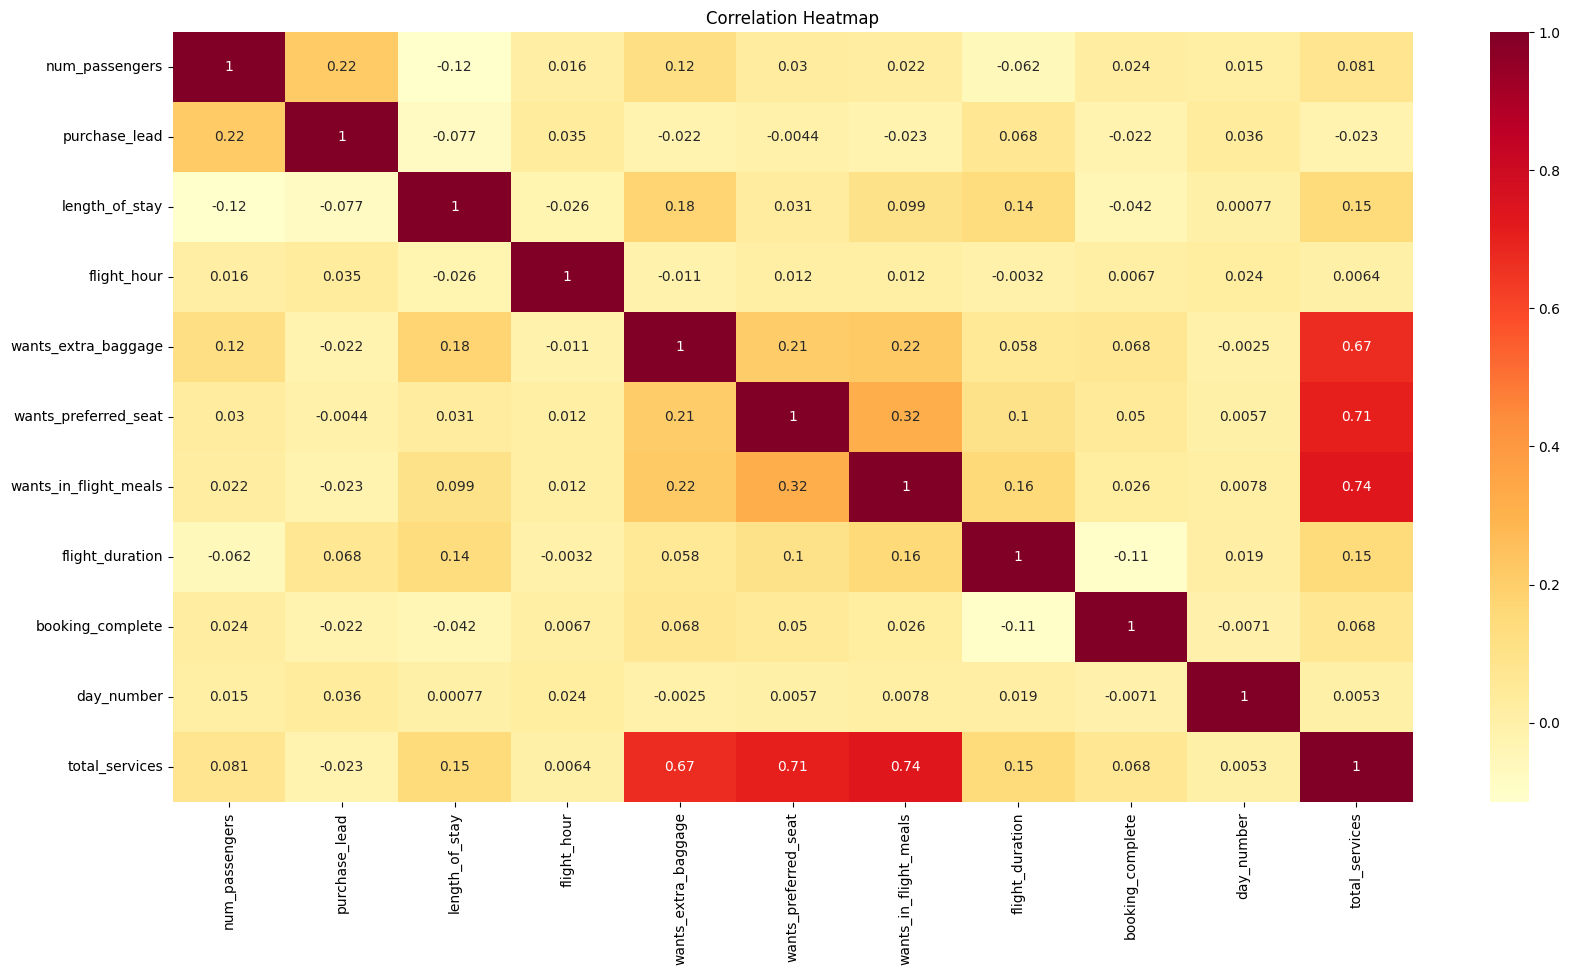

In [118]:

def plot_correlation_heatmap(df, booking_origin=None):
    if booking_origin:
        filtered_df = df[df['booking_origin'] == booking_origin]
        title = f'{booking_origin} | Correlation Heatmap'
    else:
        filtered_df = df.copy()
        title = 'Correlation Heatmap'

    correlation_matrix = filtered_df.corr()

    plt.figure(figsize=(20, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd')
    plt.title(title)
    plt.show()

plot_correlation_heatmap(df,country_filter)
# Correlation between all three factors (especially flight meals and preferred seat (0.32))
# We can disregard Total Services since it is the sum of all three of the correlated variables

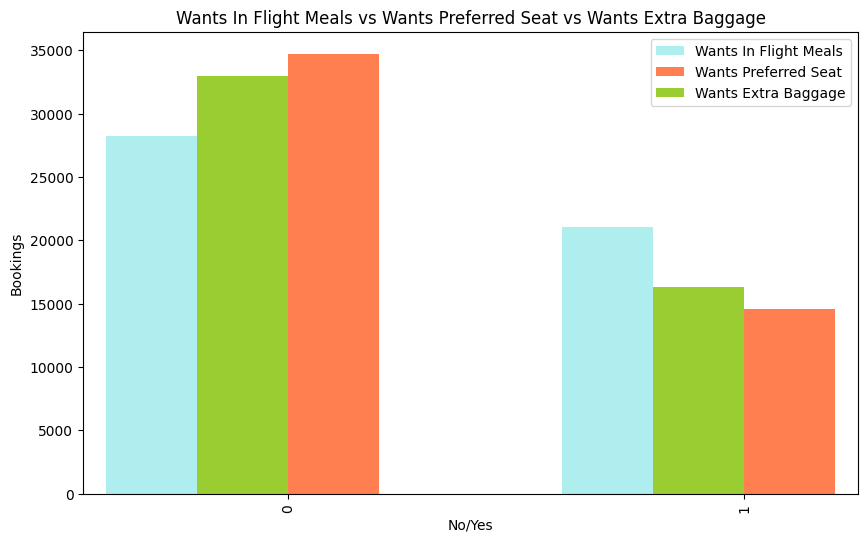

In [119]:
import matplotlib.pyplot as plt

seat = df['wants_preferred_seat'].value_counts()
meals = df['wants_in_flight_meals'].value_counts()
baggage = df['wants_extra_baggage'].value_counts()

# Reduce the bar width to lessen the space between bars
bar_width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

meals.plot.bar(position=2, width=bar_width, color='paleturquoise', label='Wants In Flight Meals', ax=ax)
seat.plot.bar(position=0, width=bar_width, color='coral', label='Wants Preferred Seat', ax=ax)
baggage.plot.bar(position=1, width=bar_width, color='yellowgreen', label='Wants Extra Baggage', ax=ax)

# Customize the plot
plt.xlabel('No/Yes')
plt.ylabel('Bookings')
plt.title('Wants In Flight Meals vs Wants Preferred Seat vs Wants Extra Baggage')
plt.xticks(range(len(meals)), meals.index)

# Add a legend
ax.legend()

# Display the plot
plt.show()

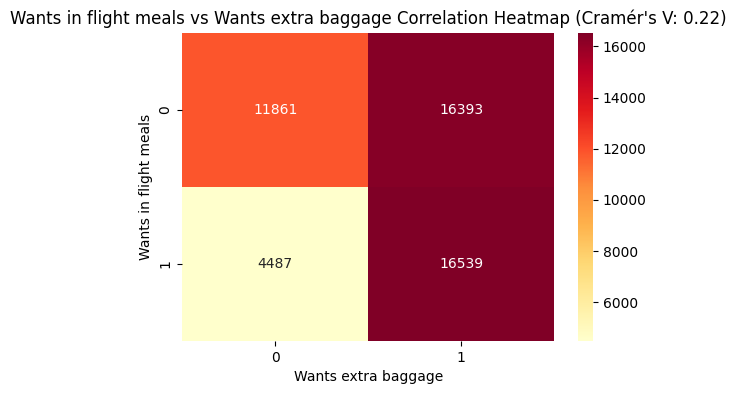

In [120]:
def binary_variable_correlation_heatmap(df, binary_var_1, binary_var_2, booking_origin=None):
    if booking_origin:
        filtered_df = df[df['booking_origin'] == booking_origin]
        title = f'{booking_origin} | {capitalize_variable(binary_var_1)} vs {capitalize_variable(binary_var_2)} Correlation Heatmap'
    else:
        filtered_df = df.copy()
        title = f'{capitalize_variable(binary_var_1)} vs {capitalize_variable(binary_var_2)} Correlation Heatmap'

    # Create a cross-tabulation of the two binary variables
    cross_tab = pd.crosstab(filtered_df[binary_var_1], filtered_df[binary_var_2])

    # Calculate the correlation coefficient (Cramér's V) for binary variables
    def cramers_v(table):
        chi2 = stats.chi2_contingency(table)[0]
        n = table.sum().sum()
        phi2 = chi2 / n
        r, k = table.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
        rcorr = r - ((r-1)**2) / (n-1)
        kcorr = k - ((k-1)**2) / (n-1)
        return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

    correlation_coefficient = cramers_v(cross_tab)

    # Create a heatmap of the cross-tabulation
    plt.figure(figsize=(6, 4))
    sns.heatmap(cross_tab, annot=True, cmap='YlOrRd', fmt='d')
    plt.title(f'{title} (Cramér\'s V: {correlation_coefficient:.2f})')
    plt.xlabel(capitalize_variable(binary_var_2))
    plt.ylabel(capitalize_variable(binary_var_1))
    plt.show()

binary_variable_correlation_heatmap(df, 'wants_in_flight_meals','wants_extra_baggage',country_filter)

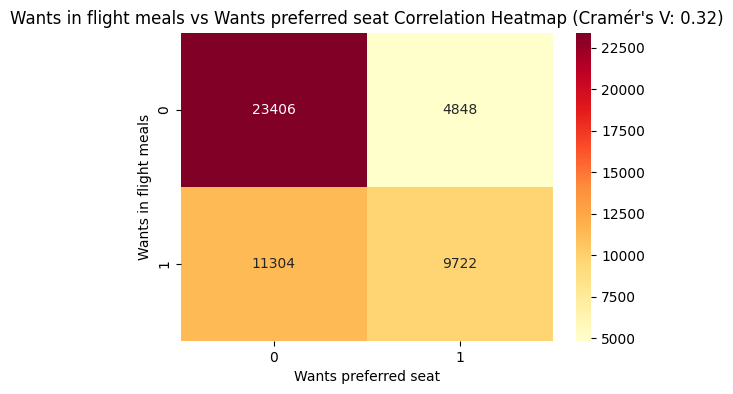

In [121]:
binary_variable_correlation_heatmap(df, 'wants_in_flight_meals','wants_preferred_seat',country_filter)

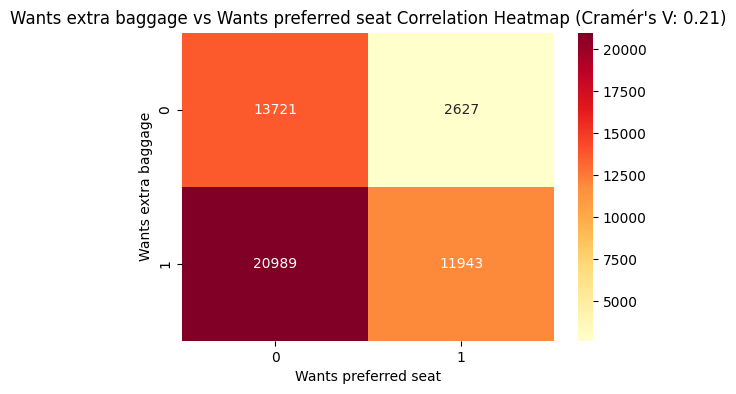

In [122]:
binary_variable_correlation_heatmap(df, 'wants_extra_baggage','wants_preferred_seat',country_filter)

# Statistical Analysis By Booking Completion

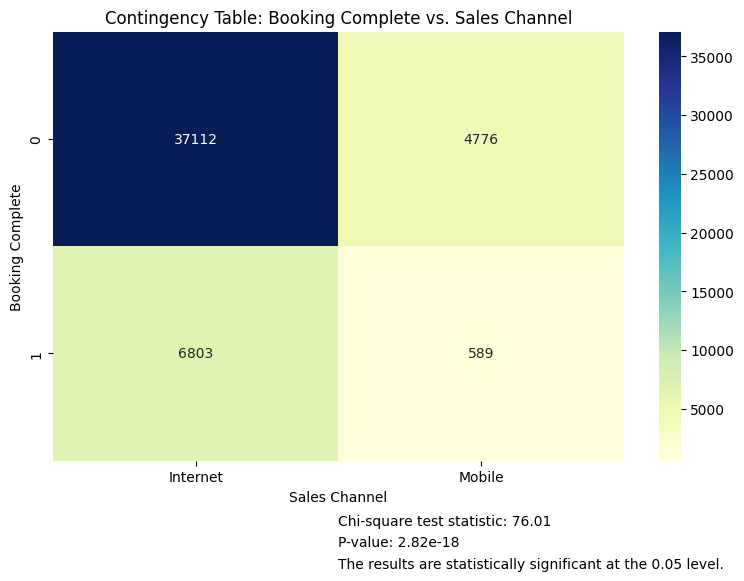

In [134]:
# create a contingency table
contingency_table = pd.crosstab(df['booking_complete'], df['sales_channel'])

# chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# significance level
significance_level = 0.05

# contingency table as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Sales Channel')
plt.ylabel('Booking Complete')
plt.title('Contingency Table: Booking Complete vs. Sales Channel')

# add the chi-square test results to the plot
plt.text(0.5, -0.15, f"Chi-square test statistic: {chi2:.2f}", transform=plt.gca().transAxes)
plt.text(0.5, -0.20, f"P-value: {p_value:.2e}", transform=plt.gca().transAxes)

if p_value <= significance_level:
    plt.text(0.5, -0.25, f"The results are statistically significant at the {significance_level} level.", transform=plt.gca().transAxes)
else:
    plt.text(0.5, -0.25, f"The results are not statistically significant at the {significance_level} level.", transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

In [135]:
# create a contingency table
contingency_table = pd.crosstab(df['booking_complete'], df['sales_channel'])

# Calculate the Phi coefficient
def phi_coefficient(contingency_table):
    a = contingency_table.iloc[0, 0]
    b = contingency_table.iloc[0, 1]
    c = contingency_table.iloc[1, 0]
    d = contingency_table.iloc[1, 1]
    return (a * d - b * c) / np.sqrt((a + b) * (c + d) * (a + c) * (b + d))

phi_coeff = phi_coefficient(contingency_table)

print(f"Phi coefficient: {phi_coeff:.2f}")

Phi coefficient: -0.04


## Booking Completion and Purchase Lead

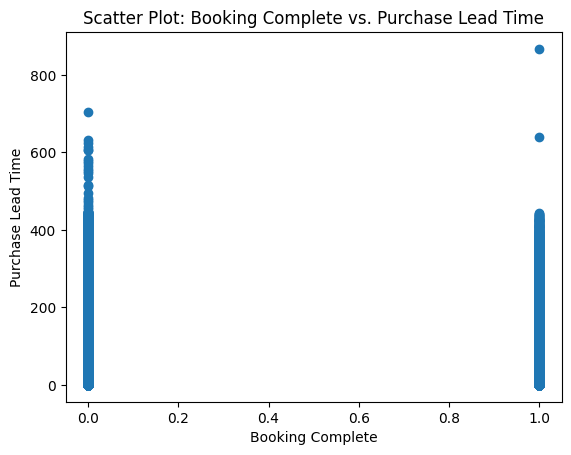

Point-Biserial Correlation Coefficient: -0.02218629275370911
P-value: 8.408536616280404e-07
The results are statistically significant at the 0.05 level.


In [137]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# calculate the point-biserial correlation
point_biserial_corr, p_value = stats.pointbiserialr(df["booking_complete"], df["purchase_lead"])

# scatter plot
plt.scatter(df["booking_complete"], df["purchase_lead"])
plt.xlabel("Booking Complete")
plt.ylabel("Purchase Lead Time")
plt.title("Scatter Plot: Booking Complete vs. Purchase Lead Time")
plt.show()

print("Point-Biserial Correlation Coefficient:", point_biserial_corr)
print("P-value:", p_value)

if p_value <= significance_level:
    print("The results are statistically significant at the", significance_level, "level.")
else:
    print("The results are not statistically significant at the", significance_level, "level.")

#significant, but weak negative correlation

## Booking Completion and Trip Type

Chi-square test statistic: 40.153921771563525
P-value: 1.908475872822034e-09
The results are statistically significant at the 0.05 level.


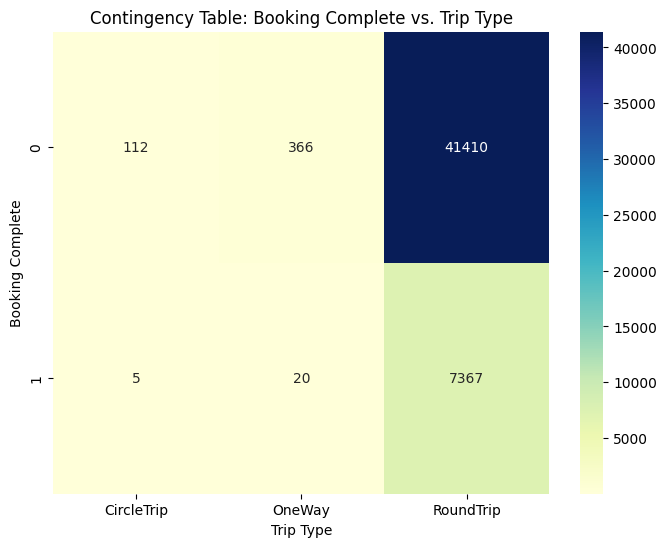

In [138]:
# contingency table
contingency_table = pd.crosstab(df['booking_complete'], df['trip_type'])

# chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-square test statistic:", chi2)
print("P-value:", p_value)

# significance level (alpha)
significance_level = 0.05

if p_value <= significance_level:
    print("The results are statistically significant at the", significance_level, "level.")
else:
    print("The results are not statistically significant at the", significance_level, "level.")

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Trip Type')
plt.ylabel('Booking Complete')
plt.title('Contingency Table: Booking Complete vs. Trip Type')
plt.show()

In [139]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# create a contingency table
contingency_table = pd.crosstab(df['booking_complete'], df['trip_type'])

# chi-square test
chi2, _, _, _ = chi2_contingency(contingency_table)

# cramer's V
def cramers_v(contingency_table):
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    phi_coefficient = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
    rows, cols = contingency_table.shape
    return phi_coefficient / np.sqrt(min(rows - 1, cols - 1))

cramers_v_value = cramers_v(contingency_table)

print("Cramer's V:", cramers_v_value)
contingency_table

Cramer's V: 0.028544907151024743


trip_type,CircleTrip,OneWay,RoundTrip
booking_complete,,,
0,112,366,41410
1,5,20,7367
